# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

In [5]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

Находим условное мат ожидание:

$\mathsf{E}(\xi | \mathcal{G}) = \frac{e^\lambda * (\lambda n - \lambda + 1) - \lambda n - 1}{(e^\lambda - 1) * \lambda}$

$\mathsf{E}(\xi^2 | \mathcal{G}) = \frac{e^\lambda*(\lambda(n - 1)(\lambda(n - 1) + 2) + 2) -\lambda n(\lambda n + 2) - 2}{(e^\lambda - 1) * \lambda^2}$

In [25]:
def CME (n, lambdaaa):
    expectation = np.exp(lambdaaa) * (lambdaaa * n - lambdaaa + 1) -  lambdaaa * n - 1
    expectation = expectation / ((np.exp(lambdaaa) - 1) * lambdaaa)
    return expectation

In [26]:
def CME_sqr (n, lambdaaa):
    expectation = np.exp(lambdaaa) * (lambdaaa * (n - 1) * (lambdaaa * (n - 1)
                     + 2) + 2) - lambdaaa * n * (lambdaaa * n + 2) - 2
    expectation = expectation / ((np.exp(lambdaaa) - 1) * lambdaaa ** 2)
    return expectation

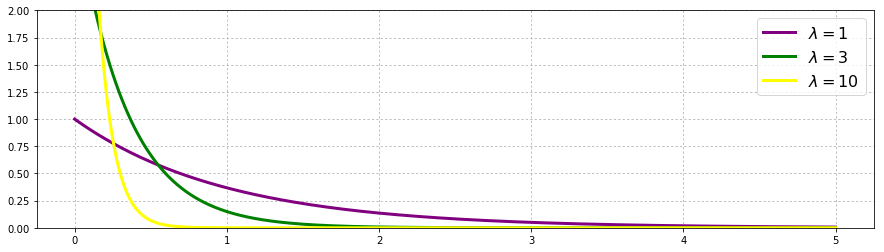

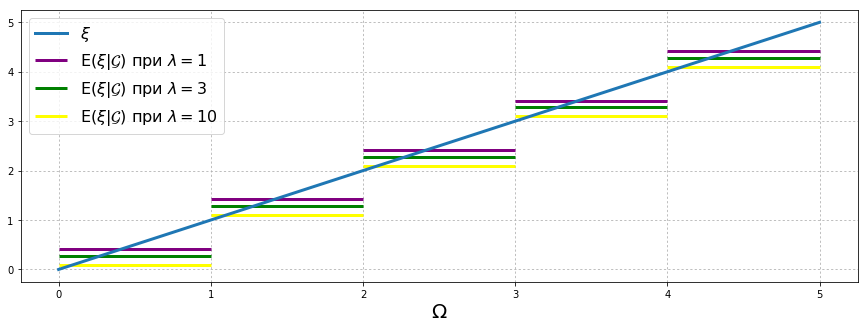

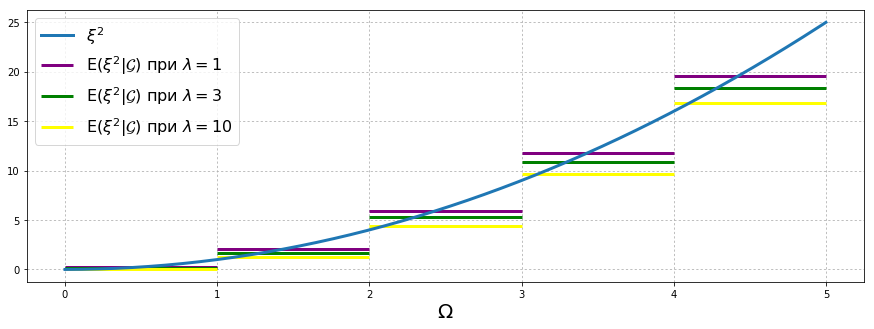

In [39]:
lambdas = [1, 3, 10]
colors = ['purple', 'green', 'yellow']
omega = np.linspace(0, 5, 500)

# График 1
plt.figure(figsize=(15, 4))
for i in range(3):
    plt.plot(omega, sps.expon.pdf(x=omega, scale=1/lambdas[i]), 
             lw=3, color=colors[i], label='$\\lambda={}$'.format(lambdas[i]))
    plt.legend(fontsize=16)
    plt.ylim((0, 2))
    plt.grid(ls=':')
plt.show()

# График 2
plt.figure(figsize=(15, 5))
plt.plot(omega, omega, lw=3, label='$\\xi$')
for j in range(3):
    for i in range (1, 6):  # события из сигма-алгебры
        plt.hlines(CME(i, lambdas[j]), i - 1, i, color=colors[j], lw=3,
                   label=('$\\mathsf{E}(\\xi|\\mathcal{G})$ при $\\lambda = ' + 
                          str(lambdas[j]) + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

# График 3 для \xi^2 аналогичен графику 2
plt.figure(figsize=(15, 5))
plt.plot(omega, omega ** 2, lw=3, label='$\\xi^2$')
for j in range(3):
    for i in range(1, 6):
        plt.hlines(CME_sqr(i, lambdas[j]), i - 1, i, color=colors[j], lw=3,
                  label=('$\\mathsf{E}(\\xi^2|\\mathcal{G})$ при $\\lambda = ' + 
                         str(lambdas[j]) + '$') if i == 1 else '')
plt.xlabel('$\\Omega$', fontsize=20)
plt.legend(fontsize=16)
plt.grid(ls=':')
plt.show()

**Вывод:**
Проверили, что по значениям УМО на интервалах можно предсказать поведение распределения

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$f_{\xi_1|\xi_2}(x | y) = \frac{p_{(\xi_1, \xi_2)} (x, y)}{p_{\xi_2}(y)}$.

Как известно, $p_{(\xi_1, \xi_2)} (x, y) = \frac{1}{2 \pi | \Sigma | ^ {\frac{1}{2}}}  e^{-\frac{1}{2} (\overline{x} - \mu)^{T} \Sigma^{-1} (\overline{x} - \mu)} = \frac{1}{12 \pi} e^{-\frac{1}{36}(5x^2 - 8xy + 5y^2)}$

Тогда: $p_{\xi_2}(y) = \int_{-\infty}^{\infty}p_{(\xi_1, \xi_2)} (x, y) dx = \frac{1}{12\sqrt{5\pi}} e ^ {-\frac{1}{20}y^2}$

Откуда находим $f_{\xi_1|\xi_2} (x|y) = \frac{1}{6} \sqrt{\frac{5}{\pi}} e^{-\frac{5}{36}x^2 + \frac{2}{9}xy - \frac{4}{45}y^2}$

In [11]:
def density (x, y):
    dens = (1/6) * np.sqrt(5 / np.pi) * np.exp(x**2 * (-5/36) +
                                               x*y*(2/9) - y**2 * (4/45))
    return dens

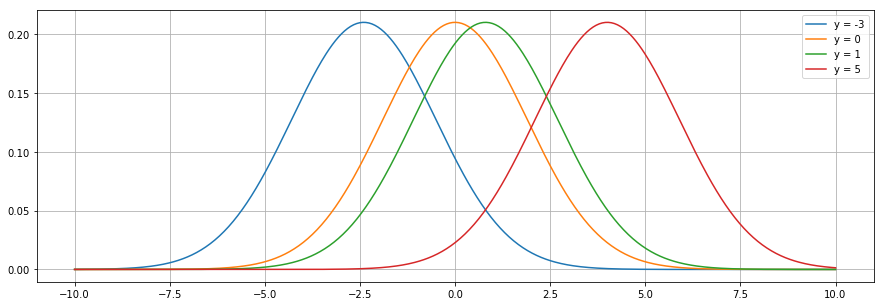

In [8]:
ygreks = [-3, 0, 1, 5]
x = np.linspace(-10, 10, 500)
plt.figure(figsize = (15, 5))
for y in ygreks:
    plt.plot(x, density(x, y), label="y = " + str(y))
plt.legend()
plt.grid()
plt.show()

**Вывод:**
Как видно из графиков, $\mathsf{E}(X_1 | X_2 = y)$ имеют нормальные распределения с разными мат ожиданиями, но одинаковой дисперсией

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

Выразим условное мат ожидание
$\mathsf{E}( N_t | N_s) = \mathsf{E}(N_s + N_t - N_s | N_s) = N_s + \mathsf{E}( N_t - N_s) = \lambda(t-s) + N_s$

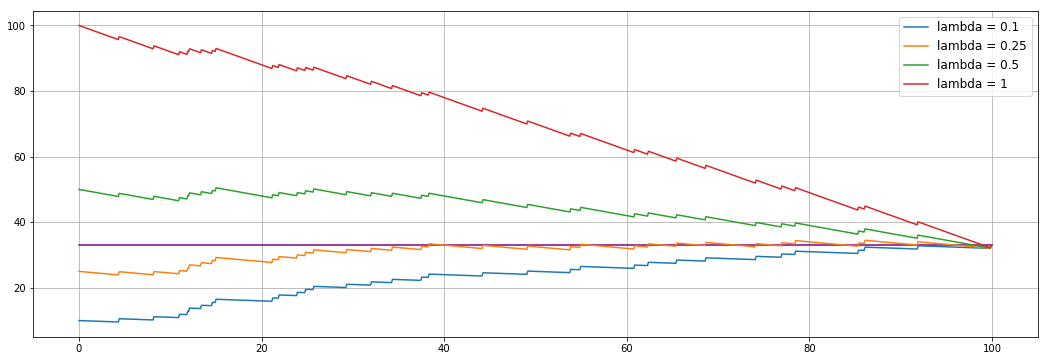

In [38]:
lambdaaa = 1/4
lambdas = [1/10, 1/4, 1/2, 1]
t = 100
sample = sps.expon.rvs(size = 100, scale=1/lambdaaa)
while np.sum(sample) < 100:
    sample = np.concatenate(sample, sps.expon.rvs(size = 100, scale=1/lambdaaa))
s = np.linspace(0, t, 1000)
N = np.array(list(map(lambda k: len(sample[np.cumsum(sample) <= k]), s)))
plt.figure(figsize=(18, 6))
zzz = len(sample[np.cumsum(sample) <= 100])
plt.plot([0, 100], [zzz, zzz], color='purple')
for lamb in lambdas:
    plt.plot(s, lamb*(t - s) + N, label='lambda = ' + str(lamb))
plt.legend(fontsize=12)
plt.grid()
plt.show()

**Вывод:** Как мы видим, количество поломанных серверов неплохо аппроксимирутся условным мат ожиданием, что позволяет определить, сколько серверов нужно будет докупить к моменту t

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [46]:
from sklearn.datasets import load_iris
data = load_iris()
sample = data['data']  # выборка
numbers = data['target']  # номера компонент смеси
print(sample)
print(numbers) 

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [45]:
sample0 = sample[numbers == 0]
sample1 = sample[numbers == 1]
sample2 = sample[numbers == 2]
mean0, cov0 = np.mean(sample0, axis=0), np.cov(sample0.T)
mean1, cov1 = np.mean(sample1, axis=0), np.cov(sample1.T)
mean2, cov2 = np.mean(sample2, axis=0), np.cov(sample2.T)

guas0 = sps.multivariate_normal(mean = mean0, cov = cov0)
guas1 = sps.multivariate_normal(mean = mean1, cov = cov1)
guas2 = sps.multivariate_normal(mean = mean2, cov = cov2)
print ("Mean0 = " + str(mean0) + "\nMatrix0 = \n", cov0)
print ("Mean1 = " + str(mean1) + "\nMatrix1 = \n", cov1)
print ("Mean2 = " + str(mean2) + "\nMatrix2 = \n", cov2)

Mean0 = [ 5.006  3.418  1.464  0.244]
Matrix0 = 
 [[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]
Mean1 = [ 5.936  2.77   4.26   1.326]
Matrix1 = 
 [[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]
Mean2 = [ 6.588  2.974  5.552  2.026]
Matrix2 = 
 [[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]


Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

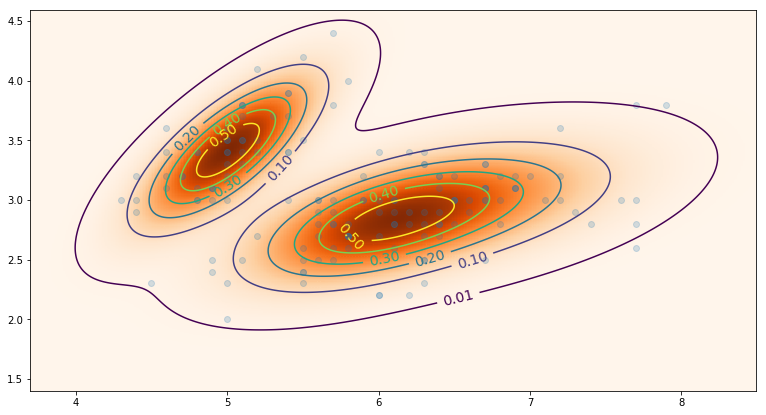

In [61]:
I = np.array([0, 1])  # это можно передавать в качестве индексов
grid = np.mgrid[3.7:8.5:0.01, 1.4:4.6:0.01]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]
pos[:, :, 1] = grid[1]

densities = np.array([
             sps.multivariate_normal.pdf(pos, mean0[:2], cov0[:2, :2]),
             sps.multivariate_normal.pdf(pos, mean1[:2], cov1[:2, :2]),
             sps.multivariate_normal.pdf(pos, mean2[:2], cov2[:2, :2])])
density = (densities[0] + densities[1] + densities[2]) / 3

plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.2)
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

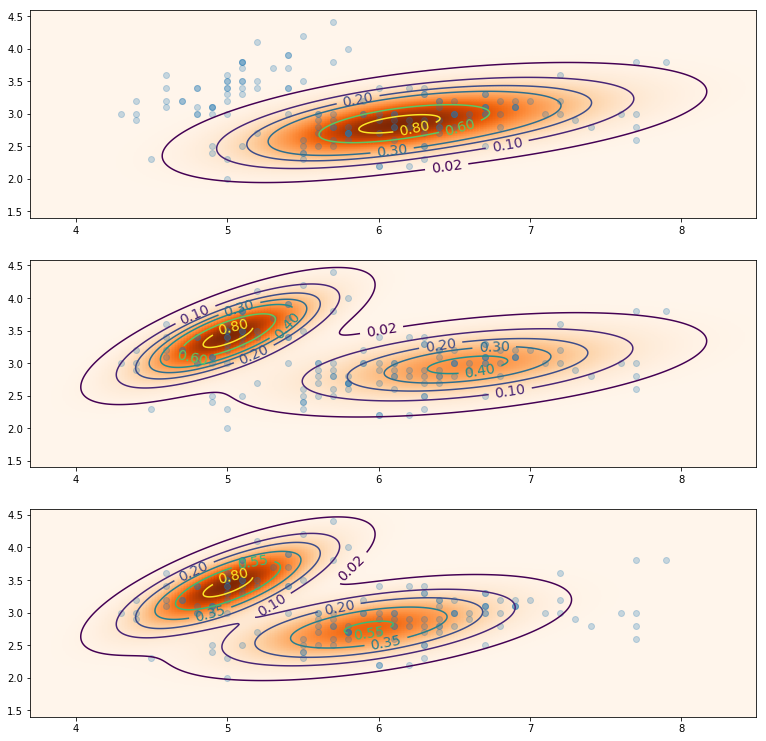

In [70]:
grid = np.mgrid[3.7:8.5:0.01, 1.4:4.6:0.01]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]
pos[:, :, 1] = grid[1]

density_1_2 = (densities[1] + densities[2]) / 2
density_0_2 = (densities[0] + densities[2]) / 2
density_0_1 = (densities[0] + densities[1]) / 2

plt.figure(figsize=(13, 13))
boards = ([0.02, 0.1, 0.2, 0.3, 0.6, 0.8], 
          [0.02, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8], 
          [0.02, 0.1, 0.2, 0.35, 0.55, 0.8])
for i, dens_board in enumerate(zip([density_1_2, density_0_2, density_0_1], boards)):
    density, board = dens_board
    plt.subplot(3, 1, i + 1)
    plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
    plt.scatter(sample[:, 0], sample[:, 1], alpha=0.25)
    CS = plt.contour(grid[0], grid[1], density, board)
    plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [72]:
def get_argmax (x):
    arr = np.array([guas0.pdf(x), guas1.pdf(x), guas2.pdf(x)])
    res = np.argmax(arr)
    return res

In [78]:
import sklearn.metrics as skm

In [79]:
prediction = np.array(list(map(lambda x:get_argmax(x), sample)))
skm.accuracy_score(prediction, numbers)

0.97999999999999998

**Вывод:** Проверили, что метод работает, так как доля ошибок на выборке оказалась мала

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture